<a href="https://colab.research.google.com/github/avnish-aryan/Leaf-Disease-Detection/blob/main/Vision%20Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset.git

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 36.20 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Updating files: 100% (182401/182401), done.


In [2]:
import os

data_path = "/content/PlantVillage-Dataset/raw/color"  # Storing the path to the repository in a variable

data_files = os.listdir(data_path)
print(data_files)

['Grape___Black_rot', 'Strawberry___healthy', 'Apple___Cedar_apple_rust', 'Tomato___Tomato_mosaic_virus', 'Corn_(maize)___Northern_Leaf_Blight', 'Strawberry___Leaf_scorch', 'Potato___Late_blight', 'Tomato___healthy', 'Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Grape___Esca_(Black_Measles)', 'Potato___Early_blight', 'Tomato___Early_blight', 'Corn_(maize)___Common_rust_', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Cherry_(including_sour)___healthy', 'Tomato___Bacterial_spot', 'Tomato___Leaf_Mold', 'Corn_(maize)___healthy', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Blueberry___healthy', 'Soybean___healthy', 'Tomato___Late_blight', 'Raspberry___healthy', 'Potato___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___Apple_scab', 'Peach___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Pepper,_bell___healthy', 'Tomato___Septoria_leaf

In [3]:
# Making directories for training, validation and testing sets

train_dir = '/content/train_data'
valid_dir = '/content/validation_data'
test_dir = '/content/test_data'

In [4]:
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [5]:
import os
import shutil
import random

In [6]:
class_folders = os.listdir(data_path)
print(class_folders)

['Grape___Black_rot', 'Strawberry___healthy', 'Apple___Cedar_apple_rust', 'Tomato___Tomato_mosaic_virus', 'Corn_(maize)___Northern_Leaf_Blight', 'Strawberry___Leaf_scorch', 'Potato___Late_blight', 'Tomato___healthy', 'Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Grape___Esca_(Black_Measles)', 'Potato___Early_blight', 'Tomato___Early_blight', 'Corn_(maize)___Common_rust_', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Cherry_(including_sour)___healthy', 'Tomato___Bacterial_spot', 'Tomato___Leaf_Mold', 'Corn_(maize)___healthy', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Blueberry___healthy', 'Soybean___healthy', 'Tomato___Late_blight', 'Raspberry___healthy', 'Potato___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___Apple_scab', 'Peach___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Pepper,_bell___healthy', 'Tomato___Septoria_leaf

In [7]:
# Using a data loader to split data

train_split = 0.8
valid_split = 0.1
test_split = 0.1

for class_folder in class_folders:
    class_path = os.path.join(data_path, class_folder)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        random.shuffle(images)

        num_images = len(images)
        num_train = int(train_split * num_images)
        num_valid = int(valid_split * num_images)

        train_images = images[:num_train]
        valid_images = images[num_train:num_train + num_valid]
        test_images = images[num_train + num_valid:]

        train_class_dir = os.path.join(train_dir, class_folder)
        valid_class_dir = os.path.join(valid_dir, class_folder)
        test_class_dir = os.path.join(test_dir, class_folder)

        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(valid_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        for image in train_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(train_class_dir, image)
            shutil.copy(src, dst)

        for image in valid_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(valid_class_dir, image)
            shutil.copy(src, dst)

        for image in test_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(test_class_dir, image)
            shutil.copy(src, dst)

print("Dataset split into train, validation, and test sets.")

Dataset split into train, validation, and test sets.


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (120, 120)
batch_size = 32

# Creating a data generator for training, validation and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


valid_datagen = ImageDataGenerator(rescale=1.0/255)


valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 43429 images belonging to 38 classes.
Found 5417 images belonging to 38 classes.
Found 5459 images belonging to 38 classes.


In [9]:
input_shape = (120,120,3)
num_classes = 38

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Model Architecture

def create_vit_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    patch_size = 16
    num_patches = (input_shape[0] // patch_size) * (input_shape[1] // patch_size)
    embedding_dim = 256
    num_heads = 4
    mlp_dim = 512
    num_layers = 6

    # Patch embedding layer
    x = layers.Conv2D(embedding_dim, kernel_size=patch_size, strides=patch_size, padding="valid")(inputs)
    x = layers.Reshape((num_patches, embedding_dim))(x)

    # Positional embedding
    positions = keras.layers.Embedding(input_dim=num_patches, output_dim=embedding_dim)(tf.range(num_patches))
    x = x + positions

    # Transformer encoder layers
    for _ in range(num_layers):
        # Multi-head self-attention
        y = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim // num_heads)(x, x)
        y = layers.Dropout(0.1)(y)
        x = layers.LayerNormalization(epsilon=1e-6)(x + y)

        # Feed-forward MLP
        y = layers.Conv1D(filters=mlp_dim, kernel_size=1, activation="gelu")(x)
        y = layers.Conv1D(filters=embedding_dim, kernel_size=1)(y)
        y = layers.Dropout(0.1)(y)
        x = layers.LayerNormalization(epsilon=1e-6)(x + y)

    # Global average pooling and classification head
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(embedding_dim, activation="relu")(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    return model

input_shape = (120, 120, 3)
num_classes = 38

vit_model = create_vit_model(input_shape, num_classes)

vit_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

vit_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 7, 7, 256)    196864      ['input_1[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 49, 256)      0           ['conv2d[0][0]']                 
                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 49, 256)     0           ['reshape[0][0]']            

In [12]:
epochs = 40
steps_per_epoch = len(train_generator)
validation_steps = len(valid_generator)

history = vit_model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps,
)

Epoch 1/40
1358/1358 [==============================] - 250s 160ms/step - loss: 1.9770 - accuracy: 0.4453 - val_loss: 1.0735 - val_accuracy: 0.6677
Epoch 2/40
1358/1358 [==============================] - 215s 159ms/step - loss: 0.8582 - accuracy: 0.7375 - val_loss: 0.5844 - val_accuracy: 0.8145
Epoch 3/40
1358/1358 [==============================] - 211s 155ms/step - loss: 0.6138 - accuracy: 0.8079 - val_loss: 0.5093 - val_accuracy: 0.8355
Epoch 4/40
1358/1358 [==============================] - 211s 155ms/step - loss: 0.5059 - accuracy: 0.8391 - val_loss: 0.4163 - val_accuracy: 0.8665
Epoch 5/40
1358/1358 [==============================] - 213s 157ms/step - loss: 0.4210 - accuracy: 0.8648 - val_loss: 0.3358 - val_accuracy: 0.8874
Epoch 6/40
1358/1358 [==============================] - 215s 158ms/step - loss: 0.3685 - accuracy: 0.8800 - val_loss: 0.2767 - val_accuracy: 0.9066
Epoch 7/40
1358/1358 [==============================] - 213s 157ms/step - loss: 0.3316 - accuracy: 0.8908 - val_

In [13]:
test_loss, test_accuracy = vit_model.evaluate(test_generator)
print(f'Test Accuracy:{test_accuracy * 100:.2f}%')

171/171 [==============================] - 7s 41ms/step - loss: 0.1302 - accuracy: 0.9602
Test Accuracy:96.02%


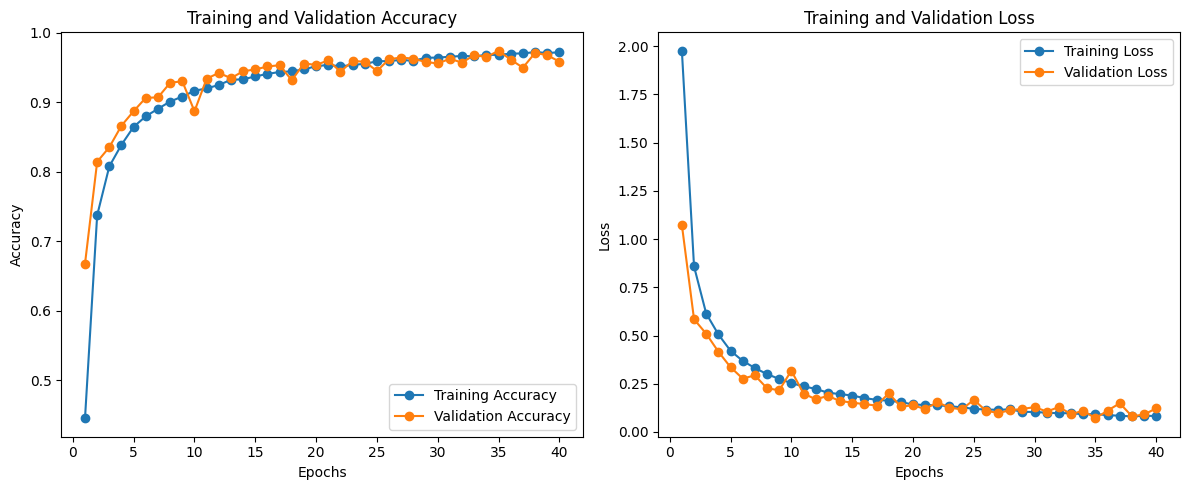

In [14]:
import matplotlib.pyplot as plt

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), training_accuracy, label='Training Accuracy', marker='o')
plt.plot(range(1, epochs + 1), validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), training_loss, label='Training Loss', marker='o')
plt.plot(range(1, epochs + 1), validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
